# 합성곱 신경망(Convolutional Neural Network)과 전이 학습(Transfer Learning)

# CNN(Convolutional Neural Network, 합성곱 신경망)과 CNN의 구조

합성곱 신경망(CNN)이 이미지 분류에서 주목받은 시기는 2012년인데요.<br/>
매년 열리는 이미지넷(ImageNet) 데이터셋 분류 경진대회인 ILSVRC 에서 2012년에 우승한 AlexNet 덕분이었습니다.

합성곱 신경망이 이미지 분류에서 주목받게 된 이유는 무엇일까요?

이미지는 위치에 맞는 **공간적인 특성**을 가지고 있습니다.<br/>
하지만 여러분이 Sprint 1 에서 구축해보셨던 다층 퍼셉트론 신경망(MLP)은<br/>
**모든 입력 값을 `Flatten`으로 펴준 뒤에 연산**하기 때문에 이런 공간적 특성을 잘 살려내지 못합니다.

MNIST 데이터 처럼 간단한 이미지 데이터는 MLP로도 분류가 가능하지만<br/>
패턴이 복잡한 컬러 이미지를 이런 방식으로 분류하는 것은 쉽지 않은데요.<br/>

반면 합성곱 신경망은 학습 과정에서 이런 공간적 특성을 보존하며 학습할 수 있습니다.<br/>
합성곱 층은 이미지의 일부분을 훑으면서 연산이 진행되며 특징을 잡아내어 학습하기 때문에<br/>
층이 깊어지더라도 공간적 특성을 최대한 보존할 수 있습니다.

### CNN의 구조

기본적인 CNN의 구조는 아래 그림과 같이 특징 추출 부분(1), 분류를 위한 신경망(2)의 2단계로 나눌 수 있습니다.


<img src="https://i.imgur.com/yVw7una.png" height="500">


먼저 특징이 추출되는 부분인 **합성곱 층(Convolution Layer)**과 **풀링 층(Pooling Layer)**에 대해서 알아보도록 하겠습니다.

## 합성곱(Convolution) 과 풀링(Pooling)

### 헙성곱(Convolution)

먼저 합성곱 층에 대해 알아보도록 하겠습니다.<br/>
합성곱 층에서는 **<font color="ff6f61">합성곱 필터(Convolution Filter)</font>**가 **슬라이딩(Sliding)**하며 이미지 부분부분의 특징을 읽어나갑니다.

아래는 필터가 슬라이딩하며 연산되는 모습을 나타낸 gif 입니다.

<img src="https://cdn-images-1.medium.com/max/800/1*MrGSULUtkXc0Ou07QouV8A.gif" height="250">

위 이미지에서 볼 수 있듯 필터가 왼쪽 위부터 차례로 슬라이딩하며 합성곱을 진행해나갑니다.<br/>
아래 그림은 각 위치에서 어떠한 방식으로 합성곱이 연산되는 지를 보여주고 있습니다.

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note431/CNN2.png" width=500>


다음으로는 Convolution에 적용할 수 있는 **패딩(Padding)**과 **스트라이드(Stride)**에 대해서 알아보도록 하겠습니다.



#### 패딩(Padding)

**<font color="ff6f61">패딩(Padding)</font>**은 이미지 외부를 특정한 값으로 둘러싸서 처리해주는 방식입니다.<br/>
아래 그림처럼 '0'으로 둘러싸주는 제로-패딩(Zero-Padding)이 가장 많이 사용됩니다.

<img src="https://i.imgur.com/GRDbmHF.gif" height="300">

연산되어 나오는 Output, 즉 Feature map 의 크기를 조절하고 실제 이미지 값을 충분히 활용하기 위해 사용됩니다.

#### 스트라이드(Stride)

**<font color="ff6f61">스트라이드(Stride)</font>**는 '보폭'이라는 뜻을 가진 단어입니다.<br/>
Stride 를 조절하면 슬라이딩(Sliding)시에 몇 칸 씩 건너뛸지를 나타냅니다.

위에서 살펴본 것처럼 필터가 한 칸씩 슬라이딩하려면 **`Stride=1`** 로 해주어야 하며<br/>
두 칸씩 슬라이딩하려면 **`Stride=2`** 로 설정해주어야 합니다.

두 가지 경우에 대해 아래 그림을 보며 알아보도록 하겠습니다.

> ❗️ ***아래 그림에서 Stride가 변함에 따라 출력되는 Feature map의 크기가 어떻게 변하는지 주목해봅시다.***

- **Stride = 1**

<img src="https://adeshpande3.github.io/assets/Stride1.png"/>

- **Stride = 2**

<img src="https://adeshpande3.github.io/assets/Stride2.png"/>

- **필터 크기(Filter size), 패딩(Padding), 스트라이드(Stride)에 따른 Feature map 크기 변화**

$$
N_{\text{out}} = \bigg[\frac{N_{\text{in}} + 2p - k}{s}\bigg] + 1
$$

$N_{\text{in}}$ : 입력되는 이미지의 크기(=피처 수) <br/>
$N_{\text{out}}$ : 출력되는 이미지의 크기(=피처 수) <br/>
$k$ : 합성곱에 사용되는 커널(=필터)의 크기 <br/>
$p$ : 합성곱에 적용한 패딩 값 <br/>
$s$ : 합성곱에 적용한 스트라이드 값

### 풀링(Pooling)

가로, 세로 방향의 공간을 줄이기 위한 **<font color="ff6f61">풀링(Pooling)</font>**을 수행합니다.

풀링 방법에는 **최대 풀링(Max pooling)**과 **평균 풀링(Average pooling)**이 있습니다. <br/>
최대 풀링은 정해진 범위 내에서 가장 큰 값을 꺼내오는 방식이며 평균 풀링은 정해진 범위 내에 있는 모든 요소의 평균을 가져오는 방식입니다.<br/>
일반적으로 이미지를 처리할 때에는 각 부분의 특징을 최대로 보존하기 위해서 최대 풀링을 사용합니다.<br/>
아래 그림은 $2×2$ 크기의 최대 풀링과 평균 풀링을 처리하는 과정을 비교하여 나타낸 것입니다.

<img src="https://i.imgur.com/ZuJLMFi.png" height="350">

위 그림에서 왼쪽은 최대 풀링으로 각각의 2×2의 범위 내에서 가장 큰 요소인 100,184,12,45 출력 데이터로 가져옵니다.<br/>
오른쪽은 평균 풀링으로 각각의 2×2의 범위 내 요소의 평균값인 36,80,12,15 를 출력 데이터로 가져옵니다.

풀링 층은 학습해야 할 **가중치가 없으며 채널 수가 변하지 않는다**는 특징을 가지고 있습니다.

### 완전 연결 신경망(Fully Connected Layer)

합성곱 층(Convolutional Layer)와 풀링 층(Pooling Layer)에서 충분히 특징을 추출했다면,<br/>
다음은 분류를 위한 완전 연결 신경망을 구축할 차례입니다.

완전 연결 신경망은 여러분이 이전에 구축했던 다층 퍼셉트론 신경망으로 구성되어 있으며<br/>
풀어야 하는 문제에 따라서 출력층을 잘 설계해주는 것이 중요합니다.

### CNN의 학습

그렇다면 CNN에서는 어떤 부분이 학습될까요?<br/>
층에서 어떤 부분에 학습되는 가중치가 있었을 지 알아보도록 합시다.


정답은 Convolution 층에 있는 **Filter의 가중치**입니다.

그렇다면 학습된 필터의 모습은 어떻게 생겼을까요?<br/>
아래 그림은 ImageNet 데이터를 학습한 CNN의 첫 번째 Convolution 층의 Filter 가중치를 시각화한 이미지입니다.

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note431/CNN3.png" height = "300"/>

그럼 층이 깊어지면 필터는 어떤 특징을 잡아낼까요?<br/>
Convolution 층과 Pooling 층을 거치면서 이미지가 작아지고 Convolution 층의 Filter는 더 큰 특징을 포착하게 됩니다.

아래는 CNN층이 깊어지면서 필터가 어떤 부분을 학습하게 되는 지를 나타낸 이미지입니다.

<img src="https://i.imgur.com/0mOlT1j.jpg" height="450">

그림을 보면 낮은 층에서는 가로, 세로 등의 특징을 학습함을 볼 수 있고, 층이 깊어지면서 물체의 일부를 포착하게 됩니다.<br/>
그리고 층이 더욱 깊어지게 되면 물체 전체의 윤곽에 해당하는 특징을 학습함을 알 수 있습니다.

### Example

일반적인 이미지를 10개의 클래스로 분류하는 데이터셋인 **Cifar10 데이터셋**을 직접 구축한 CNN을 통해 분류하는 예제를 풀어보도록 하겠습니다. 

> ❓ ***Cifar10 예제는 이진 분류, 다중 분류, 회귀 중 어디에 속할까요? <br/>
<font color="ff6f61">항상 문제를 풀기 전에 자신이 풀고자 하는 문제가 어디에 속하는지 생각</font>해보도록 합시다.***

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

2. **시드(Seed)를 고정합니다.**

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

3. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

4. **이제 본격적으로 신경망 모델을 구축해보겠습니다.**

    3개의 Convolution 층 사이에 Pooling 층을 끼워넣어 특징 추출 부분을 구성하고<br/>
1개의 은닉층과 출력층으로 구성된 완전 연결 신경망으로 분류기를 구축합니다.

    > ❗️ ***아래 주어진 예시 코드 이외에도 층을 추가해보거나 제외해보면서<br/>
모델 구조를 다양하게 바꾸어 성능을 테스트 해봅시다.***

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10)

Epoch 1/10
313/313 [==============================] - 17s 14ms/step - loss: 1.5793 - accuracy: 0.4264 - val_loss: 1.2993 - val_accuracy: 0.5414
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 1.1586 - accuracy: 0.5910 - val_loss: 1.0574 - val_accuracy: 0.6259
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.9734 - accuracy: 0.6585 - val_loss: 1.0016 - val_accuracy: 0.6493
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.8481 - accuracy: 0.7022 - val_loss: 0.9222 - val_accuracy: 0.6793
Epoch 5/10
313/313 [==============================] - 2s 8ms/step - loss: 0.7571 - accuracy: 0.7358 - val_loss: 0.8491 - val_accuracy: 0.7005
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6743 - accuracy: 0.7637 - val_loss: 0.8062 - val_accuracy: 0.7216
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6072 - accuracy: 0.7872 - val_loss: 0.7828 - val_accuracy: 0.7328
Epoc

5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [9]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.8758 - accuracy: 0.7289 - 930ms/epoch - 3ms/step


[0.8757608532905579, 0.7289000153541565]

## 전이학습 (Transfer Learning)


논문 등 여러 학술자료를 검색할 수 있는 [구글 스칼라(Google Scholar)](https://scholar.google.com/)로 가면 다음과 같은 말을 볼 수 있습니다.

<img src="https://i.imgur.com/0AgnMo3.png" height="250"/>


위 페이지에서 볼 수 있는 **"거인의 어깨에 올라서서 더 넓은 세상을 바라보라"**는 말은<br/>
'이미 잘 정립된 지식을 바탕으로 하여 더 높은 곳에 이를 수 있었다'는 뜻을 가지고 있는데요.

이를 신경망 학습에 적용한 것이 바로 **<font color="ff6f61">전이 학습(Transfer Learning)</font>** 입니다.<br/>
일반적으로 전이 학습은 대량의 데이터를 학습한 **사전 학습 모델(Pre-trained Model)**의 가중치를 그대로 가져온 뒤<br/>
분류기, 즉 완전 연결 신경망 부분만 추가로 설계하여 사용합니다.

다음 이미지는 전이 학습을 나타낸 이미지입니다.<br/>
사전 학습 모델(위)을 바탕으로 새로운 모델(아래)을 구축합니다.

<img src="https://i.imgur.com/LT79Yw1.jpg" height="400"/>



사전 학습 모델의 가중치는 대량의 데이터를 학습하여 얻어지는데요.<br/>
여러 데이터의 일반적인 특징을 많이 학습하였기 때문에 어떠한 데이터를 넣더라도 준수한 성능을 보입니다.

일반적으로 사전 학습 가중치는 학습되지 않도록 고정(**`freeze`**)한 채로 진행되기 때문에<br/>
빠르게 좋은 결과를 얻을 수 있다는 장점이 있습니다.

#### 이미지 분류를 위한 주요 사전 학습 모델(Pre-trained Model)

다음으로는 이미지 분류에서 사용되는 주요 사전 학습 모델인 **VGG, Inception, ResNet** 에 대해 알아보도록 하겠습니다.


- **VGG**

VGG는 2014년 ILSVRC 에서 우승을 거둔 모델입니다.<br/>
층의 개수에 따라 VGG13, VGG16, VGG19 가 있는데요.<br/>
모든 VGG는 아래와 같은 3가지 특징을 가지고 있습니다.

1. 모든 합성곱 층에서 **3×3 크기의 필터 사용**<br/>
    - 대신 층을 깊게 쌓음으로써 기존 7×7, 11×11 크기의 필터 이상의 표현력을 가질 수 있도록 함
2. 활성화 함수로 **ReLU를 사용**하고 가중치 초깃값으로는 **He 초기화**을 사용<br/>
    - 층을 깊게 쌓았음에도 기울기 소실(Gradient vanishing)문제기 빌셍하지 않음
3. 마지막으로 완전 연결 층에 드롭아웃(Dropout)을 사용하여 과적합 방지 및 옵티마이저는 아담(Adam)  사용

VGG16의 모델 구조는 아래와 같습니다.

<img src="https://i.imgur.com/2egGDNg.png" height="300"/>

- **GoogLeNet(Inception)**

GoogleNet은 2015년 ILSVRC 에서 우승을 거둔 모델입니다.<br/>
GoogLeNet 역시 기본적인 합성곱 신경망이 결합된 형태를 띠고 있는데요.<br/>
하지만 세로 방향의 깊이 뿐만 아니라 **가로 방향으로도 넓은 신경망 층**을 가지고 있다는 것이 특징입니다.

GoogLeNet의 구조는 아래와 같습니다.


<img src="https://i.imgur.com/zt5ND1y.png" height="300"/>


이렇게 가로 방향으로 층을 넓게 구성한 것을 **인셉션(Inception)** 구조라고 하는데요.<br/>
위와 같은 인셉션 구조를 활용하여 크기가 다른 필터와 풀링을 병렬적으로 적용한 뒤 결과를 조합합니다.

- **ResNet**

ResNet은 2016년 ILSVRC 에서 우승을 거둔 모델입니다.<br/>
먼저 ResNet의 구조를 나타낸 이미지를 살펴보겠습니다.

<img src="https://i.imgur.com/DWcwuKl.png" height="400"/>



  위 이미지에서 층을 넘어 이어지는 화살표를 볼 수 있는데요.<br/>
  이 화살표는 ResNet의 특징인 **Residual Connection(=Skipped Connection)** 입니다.<br/>
  Residual Connection를 이미지로 나타내면 아래와 같은데요.

<img src="https://i.imgur.com/xdNL4LC.jpg" height="300"/>

층을 거친 데이터의 출력에 거치지 않은 출력을 더해주게 됩니다.<br/>
이 방법을 사용하면 역전파 과정에서 미분을 적용하더라도 1 이상의 값으로 보존되기 때문에<br/>
층이 깊어짐에 따라 발생하는 기울기 소실(Vanishing Gradient) 문제를 어느정도 해결할 수 있습니다.

다음은 이러한 사전 학습 모델을 Keras 코드를 통해 어떻게 적용할 수 있을지에 대해 알아보겠습니다.

#### Example

일반적인 이미지를 10개의 클래스로 분류하는 데이터셋인 **Cifar10 데이터셋**을 VGG를 통해 분류하는 예제를 풀어보도록 하겠습니다. 

1. **먼저 필요한 패키지와 라이브러리를 불러옵니다.**

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

2. **시드(Seed)를 고정합니다.**

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

3. **데이터셋을 불러온 후 학습 데이터셋(Train Dataset)과 시험 데이터셋(Test Dataset)으로 나누어(Split)주고 픽셀값을 정규화 하여줍니다.**

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

4. **사전 학습 모델을 불러옵니다.**

In [16]:
pretrained_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


5. **사전 학습 모델 위에 완전 연결 신경망을 추가합니다.**

    아래에 추가된 **`GlobalAveragePooling2d()`** 층은<br/>
    데이터 Shape을 **`(None, None, None, 512)`**에서 **`(None, 512)`**로 변화시켜주는 역할을 합니다.

In [17]:
model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10)

Epoch 1/10
313/313 [==============================] - 27s 63ms/step - loss: 2.0262 - accuracy: 0.1971 - val_loss: 1.8199 - val_accuracy: 0.2685
Epoch 2/10
313/313 [==============================] - 18s 56ms/step - loss: 1.5494 - accuracy: 0.3968 - val_loss: 1.2510 - val_accuracy: 0.5376
Epoch 3/10
313/313 [==============================] - 18s 57ms/step - loss: 1.1058 - accuracy: 0.5973 - val_loss: 0.9648 - val_accuracy: 0.6556
Epoch 4/10
313/313 [==============================] - 19s 61ms/step - loss: 0.8843 - accuracy: 0.6844 - val_loss: 0.8913 - val_accuracy: 0.6921
Epoch 5/10
313/313 [==============================] - 19s 62ms/step - loss: 0.7415 - accuracy: 0.7394 - val_loss: 0.7900 - val_accuracy: 0.7289
Epoch 6/10
313/313 [==============================] - 19s 62ms/step - loss: 0.6255 - accuracy: 0.7861 - val_loss: 0.7164 - val_accuracy: 0.7634
Epoch 7/10
313/313 [==============================] - 18s 57ms/step - loss: 0.5306 - accuracy: 0.8193 - val_loss: 0.7024 - val_accuracy:

5. **학습한 신경망 모델을 사용하여 평가합니다.**

In [21]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 3s - loss: 0.7140 - accuracy: 0.7826 - 3s/epoch - 8ms/step


[0.7140434384346008, 0.7825999855995178]

## 이미지 증강(Image Augmentation)

기본적인 **이미지 증강(Image Augmentation)** 방법에 대해서 알아보겠습니다.<br/>
이미지 증강이란 회전, 반전, 자르기, 밝기 혹은 채도 변화 등을 통해 데이터를 늘리는 방법인데요.

아마 여러분들은 대부분 아래 사진에 있는 동물이 무엇인지 판단하실 수 있을 겁니다.

<img src="https://i.imgur.com/7nP1Kv2.jpg" height="300"/>
<img src="https://i.imgur.com/VQIdbd3.jpg" height="300"/>


하지만 우리가 가지고 있는 데이터셋은 대부분 정면의 고양이 사진을 가지고 학습하게 되는데요.<br/>
그렇기 때문에 우리의 모델은 위와 같이 판단해야 하는 물체가 기울어져 있거나 뒤집어진 이미지에서는 잘 예측하지 못한다는 취약점을 가지고 있습니다.

사람처럼 **일반화(Generalization)**가 잘 되는 모델을 만들기 위해서 학습 데이터셋에 있는 이미지를 일부러 회전하거나 기울여서 나타내는데요.<br/>
이러한 방법을 **<font color="ff6f61">이미지 데이터 증강(Image Data Augmentation)</font>** 이라고 합니다. 

이미지 증강을 사용하면 이미지를 랜덤하게 회전하거나, 늘리고 줄이거나, 확대하거나, 좌우 반전한 이미지 등을 훈련 데이터셋으로 사용할 수 있습니다.<br/>
이를 통해 더욱 **강건(Robust)**한 모델을 만들 수 있습니다.


# Exercise

### Sobel Filter를 이용해 실제 Convolution(합성곱) 연산이 일어날 때, 이미지가 어떻게 변화하는지 시각화해보겠습니다.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

### 이미지 선정
이미지는 원하시는 아무 이미지를 업로드해서 진행해주세요

In [23]:
from google.colab import files
lena_img = files.upload()

Saving 박지수 사진.jpg to 박지수 사진.jpg


3 채널의 컬러 이미지를 gray scale로 변형하여 사용하겠습니다

In [24]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

Color Img Shape :  (531, 413, 3)
GrayScale Img Shape : (531, 413)


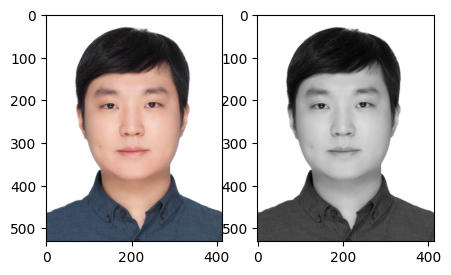

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

img = plt.imread('박지수 사진.jpg')
gray_img = rgb2gray(img)
print("Color Img Shape : ", img.shape)
print("GrayScale Img Shape :", gray_img.shape)
axes[0].imshow(img)
axes[1].imshow(gray_img, 'gray')

수직선과 수평선을 detect하는 Sobel Filter를 이용해 합성곱 연산을 진행하겠습니다

In [27]:
sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_horizontal = np.array([[1, 2, 1],
                             [0, 0, 0],

                             [-1, -2, -1]])

다음은 Convolution 연산을 진행하는 함수입니다.

In [28]:
def convolve2D(image, filter, padding=0, strides=1):
  filter_H, filter_W = filter.shape[0], filter.shape[1]
  img_H, img_W = image.shape[0], image.shape[1]

  # Convolution 연산의 출력값인 특성맵 shape
  output_H = int(((img_H - filter_H + 2 * padding) / strides) + 1)
  output_W = int(((img_W - filter_W + 2 * padding) / strides) + 1)
  output = np.zeros((output_H, output_W))

  # Padding 적용하기
  if padding != 0:
    padded_img = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    padded_img[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
  else:
    padded_img = image

  padded_img_H, padded_img_W = padded_img.shape[0], padded_img.shape[1]

  val_H = padded_img_H - (filter_H - 1)
  val_W = padded_img_W - (filter_W - 1)

  for h in range(0, val_H, strides):
    for w in range(0, val_W, strides):
      output[h, w] = (filter * padded_img[h:h+filter_H, w:w+filter_W]).sum()

  return output

Text(0.5, 1.0, 'Horizontal Sobel Filter')

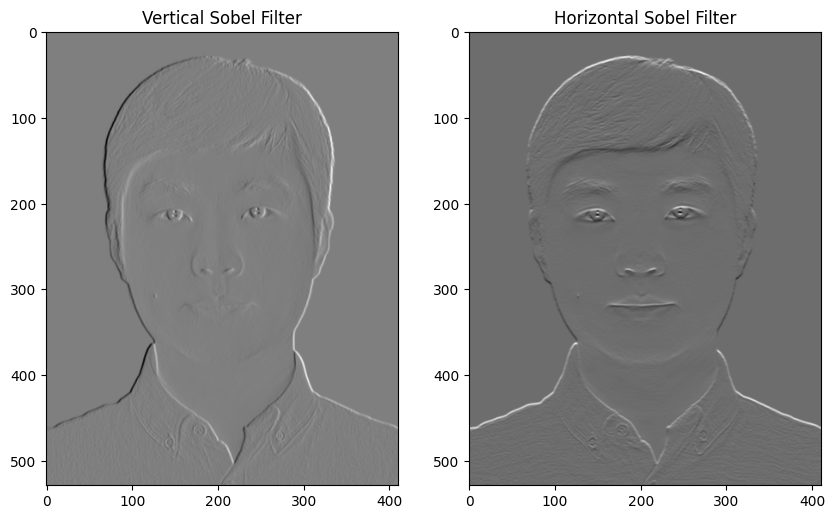

In [29]:
vertical_output = convolve2D(gray_img, sobel_vertical)
horizontal_output = convolve2D(gray_img, sobel_horizontal)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))

axes[0].imshow(vertical_output, 'gray')
axes[0].set_title('Vertical Sobel Filter')
axes[1].imshow(horizontal_output, 'gray')
axes[1].set_title('Horizontal Sobel Filter')

max pooling을 진행해주세요

In [30]:
def maxPooling2D(image, pool_size=2, strides=2):
  img_H, img_W = image.shape[0], image.shape[1]
  valid_H, valid_W = img_H - (pool_size - 1), img_W - (pool_size - 1)
  
  pooled = []
  for h in range(0, valid_H, strides):
    pooled_ = []
    for w in range(0, valid_W, strides):
      pooled_.append(np.max(image[h:h+pool_size, w:w+pool_size]))
    pooled.append(pooled_)

  return pooled

Text(0.5, 1.0, 'Horizontal Sobel Filter After MaxPooling')

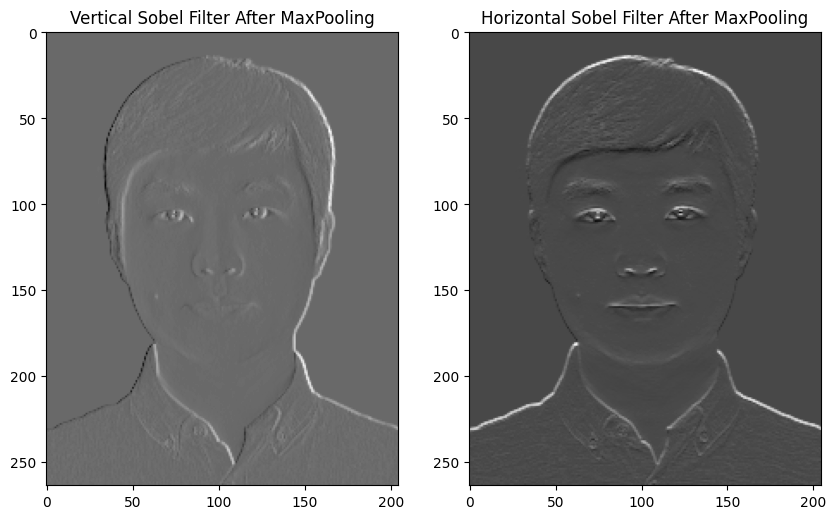

In [31]:
vertical_maxpool_output = maxPooling2D(vertical_output)
horizontal_maxpool_output = maxPooling2D(horizontal_output)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))

axes[0].imshow(vertical_maxpool_output, 'gray')
axes[0].set_title('Vertical Sobel Filter After MaxPooling')
axes[1].imshow(horizontal_maxpool_output, 'gray')
axes[1].set_title('Horizontal Sobel Filter After MaxPooling')

## 케라스를 이용한 바이너리 이미지 분류 모델에 3가지 CNN 모델을 적용하여 보는 과제입니다. <br/>

- [데이터 다운로드](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/mountainForest.zip)

산의 이미지(./data/mountin/*)와 숲의 이미지(./data/forest/*)를 분류하는 문제입니다. <br/>
산을 Positive (1)로, 숲 이미지를 Negative(0)로 레이블링 하여줍니다.

클래스당 약 350개의 이미지로 이루어져 있는데요.<br/>
표본이 작다는 점을 감안하면 현실적으로 어려운 문제입니다.

하지만 이번 과제에서는 해당 데이터에 여러 가지 모델을 적용해보는는 것에 중점을 두어 봅시다. <br/>

## Part 1 : Pre-trained Model



Keras에서 제공하는 pre-trained 모델인 ResNet50을 불러와서 사용해봅니다. [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1)은 50 개의 layer를 가진  CNN기반의 모델입니다. <br/>
이미지를 [1000 개의 클래스로](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt)를 분류하는 모델인데요. 우리가 풀어야 할 과제는 2가지 이므로 마지막 출력단을 변경해서 사용해 볼 수 있습니다.


`ResNet50`을 불러올 때, **`include_top=False`** 로 하면, 기존 1000가지 클래스로의 분류 문제를 풀 수 있는 ResNet 모델에서 Fully Connected layer 부분을 제거해주는 역할을 합니다.

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D()
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)
```

아래 부분은 ResNet50 레이어들의 파라미터를 학습하지 않도록 설정합니다. <br/>
이렇게 설정된 매개 변수는 역전파를 통해 오차 정보가 전파 되더라도 파라미터가 업데이트 되지 않습니다.

```python
for layer in resnet.layers:
    layer.trainable = False
```

모델에 추가로 **`Fully-conneted layer(Dense)`** 를 추가해야 합니다. <br/>
사전 학습 모델을 불러오면서 최상위 레이어인 **`Fully-conneted layer`** 를 제거했기 때문이지요.

새로 추가하는 **`Fully-conneted layer`** 에서는 목적인 이진 분류에 맞게 출력층을 설계하여 주어야 합니다. <br/> **`GlobalAveragePooling2D`** 레이어는 마지막 컨벌루션 레이어 출력(2 차원) 각각의 평균을 취해주어 **`Dense`** 층에 들어갈 수 있도록 해줍니다.

```python
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # 출력층을 설계합니다.
model = Model(resnet.input, predictions)
```

### Load in Data

[Keras ImageDataGenerator](https://keras.io/api/preprocessing/image/) 를 참고하여 데이터를 불러옵니다. <br/>
위 링크뿐만 아니라 구글링을 통해 ImageDataGenerator 라이브러리에 대한 여러 예제를 조사하고 참고해보세요. 

Notebook을 여러분의 Google Drive에 Mount 한 후에 이미지를 불러오도록 합니다.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train = image_dataset_from_directory(
    '/content/drive/MyDrive/DS_camp/mountainForest/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation = image_dataset_from_directory(
    '/content/drive/MyDrive/DS_camp/mountainForest/validation',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 533 files belonging to 2 classes.
Found 195 files belonging to 2 classes.


### Instatiate Model

In [44]:
import numpy as np


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Fit Model

In [36]:
model.fit(train, validation_data=validation, batch_size=128, epochs=5)

Epoch 1/5
17/17 [==============================] - 247s 9s/step - loss: 0.2240 - accuracy: 0.9193 - val_loss: 0.0293 - val_accuracy: 0.9897
Epoch 2/5
17/17 [==============================] - 4s 186ms/step - loss: 0.0328 - accuracy: 0.9906 - val_loss: 0.0368 - val_accuracy: 0.9897
Epoch 3/5
17/17 [==============================] - 4s 204ms/step - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.0409 - val_accuracy: 0.9897
Epoch 4/5
17/17 [==============================] - 4s 187ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 5/5
17/17 [==============================] - 4s 189ms/step - loss: 6.7019e-04 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9897


In [37]:
model.evaluate(validation)

7/7 [==============================] - 1s 107ms/step - loss: 0.0271 - accuracy: 0.9897


[0.027081672102212906, 0.9897435903549194]

## Part 2 : Custom CNN Model

이 단계에서는 Keras를 사용하여 자신 만의 CNN을 작성하고 훈련합니다. <br/>
네트워크에 적어도 하나의 Conv 레이어와 pooling 레이어가있는 아키텍처를 만들어 사용해 보세요. <br/> 아래는 여러분이 참고할 수 있도록 표시한 결과이며 여러분의 마음대로 설계하여도 됩니다.

### Make a Custom Model

In [48]:
import tensorflow

model = Sequential([   
    tensorflow.keras.layers.Conv2D(32, (3, 3), padding="SAME", activation='relu', input_shape=(256, 256, 3)),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D((2, 2)),
    tensorflow.keras.layers.Conv2D(64, (3, 3), padding="SAME", activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D((2, 2)),
    tensorflow.keras.layers.Conv2D(64, (3, 3), padding="SAME", activation='relu'),
    tensorflow.keras.layers.BatchNormalization(),
    tensorflow.keras.layers.MaxPooling2D((2, 2)),
    tensorflow.keras.layers.Flatten(), 
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid')
])

### Compile Model

In [49]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Fit Model




In [50]:
batch_size = 64
model.fit(train, validation_data=validation, batch_size=batch_size, epochs=5)

Epoch 1/5
17/17 [==============================] - 9s 204ms/step - loss: 2.9941 - accuracy: 0.8574 - val_loss: 16.3312 - val_accuracy: 0.5897
Epoch 2/5
17/17 [==============================] - 2s 109ms/step - loss: 0.6563 - accuracy: 0.9475 - val_loss: 1.0951 - val_accuracy: 0.9077
Epoch 3/5
17/17 [==============================] - 2s 113ms/step - loss: 0.1717 - accuracy: 0.9681 - val_loss: 1.4225 - val_accuracy: 0.7487
Epoch 4/5
17/17 [==============================] - 2s 112ms/step - loss: 0.0623 - accuracy: 0.9869 - val_loss: 0.9027 - val_accuracy: 0.8103
Epoch 5/5
17/17 [==============================] - 3s 133ms/step - loss: 0.0806 - accuracy: 0.9869 - val_loss: 0.4576 - val_accuracy: 0.9077
